## 점진적인 학습이란?
- 

### 1. 데이터 준비

In [51]:
import pandas as pd

In [52]:
file_path = '../data/07_fish.csv'
fish = pd.read_csv(file_path)
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [53]:
# 결측치 확인
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


### 2. 데이터 전처리

In [54]:
### 독립변수와 종속변수를 분리하여 변수화
# 독립변수명 : fish_data
# 종속변수명 : fish_target
fish_data = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

print(fish_data.shape)
print(fish_target.shape)

(159, 5)
(159,)


In [44]:
### 훈련(입력, 타겟), 테스트(입력, 타겟) 데이터 분류
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state=42)

print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(119, 5)
(40, 5)
(119,)
(40,)


In [55]:
### 정규화(표준화) - 독립변수를 표준점수로 스케일 처리
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(train_data)

train_scaled = ss.transform(train_data)
test_scaled = ss.transform(test_data)

## 확률적 경사 하강법을 이용한 분류

In [62]:
### 사용 클래스 (모델) : SGDClassifier
from sklearn.linear_model import SGDClassifier

# 클래스(모델) 생성
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)

# 훈련모델
sc.fit(train_scaled, train_target)

# 정확도 확인
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
'''
훈련모델의 학습능력이 다소 떨어진다.
이는 훈련 및 테스트 모두 과소적합을 보인다고 할 수 있다.
'''

#### 점진적 학습

In [57]:
### 점진적 학습 시작
# 새로운 데이터가 들어왔다고 가정(실제로는 새로운 데이터 사용)
# 기존 학습 구간과 능력을 가지고 다음 구간(새로운 데이터) 학습 진행
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


#### 에포크 반복 횟수 찾기

In [58]:
import numpy as np

so = SGDClassifier(loss='log', random_state=42)

train_score = []
test_score = []

# 범주 고유값
classes = np.unique(train_target)

# 반복을 300회 이상으로 테스트하여, 정확도를 리스트에 저장
for i in range(0,300) :
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

In [59]:
print('훈련 정확도 리스트 개수 = ', len(train_score))
print('테스트 정확도 리스트 개수 = ', len(test_score))

훈련 정확도 리스트 개수 =  300
테스트 정확도 리스트 개수 =  300


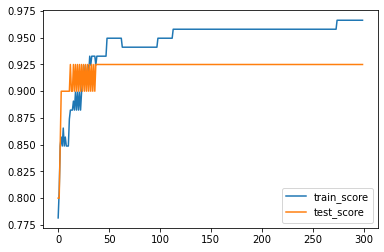

In [60]:
### 최적의 에포크 위치 확인 : 시각화
import matplotlib.pyplot as plt

plt.plot(train_score, label = 'train_score')
plt.plot(test_score, label = 'test_score')
plt.legend()
plt.show()

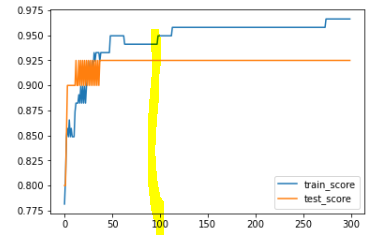

In [ ]:
'''
최적 에포크 위치 : 훈련과 테스트 정확도가 가장 가깝고 변화하는 시점의 끝부분
'''

In [98]:
### 사용 클래스 (모델) : SGDClassifier
from sklearn.linear_model import SGDClassifier

# 클래스(모델) 생성
# tol=None : 모델 스스로 훈련 끝내지말고 무조건 100번 반복하도록 지정
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)

# 훈련모델
sc.fit(train_scaled, train_target)

# 정확도 확인
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


## 모델 예측값 데이터프레임에 저장

In [ ]:
### [문제]
## - 새로운 데이터가 수집되었다고 가정하고 예측을 통해 결과값 저장
# - 기존 fish 데이터 전체를 신규데이터라고 가정하고 진행
# - 신규데이터는 Weight, Length, Diagonal, Height, Width
#  (데이터프레임 변수는 별도로 만들어서 사용)

## - 데이터프레임에 예측결과에 대한 Species_pred 컬럼 추가

## <출력결과>
# - Species_pred가 추가된 데이터프레임 출력 (7개 컬럼 모두 출력)

# - 정답을 맞춘 갯수와 틀린 갯수 출력
# - (예시) 총 갯수 [159]건 중, 정답갯수 [149]건, 오답갯수 [10]건

# - 정답률과 오답률 출력
# - (예시) 총 100.0% 중 정답률 [93.71%], 오답률[6.29%]

In [97]:
## 독립변수 데이터만 추출
pred_data = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [92]:
# 예측데이터 표준화
pred_scaled = ss.transform(pred_data)

In [ ]:
result_pred = sc.predict(pred_scaled)

In [ ]:
fish_pred = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [ ]:
# 정답갯수와 오답갯수 확인
o_cnt = len()

In [ ]:
# 정답률과 오답률 확인하기
import numpy as np
o_p = np.round()